In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
df = pd.read_csv("predictive_maintenance_dataset.csv")

# Drop non-numeric columns
df = df.drop(columns=["date", "device"])

# Features and Target
X = df.drop(columns=["failure"])
y = df["failure"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)

# Predict
dt_preds = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))
print(classification_report(y_test, dt_preds))

Decision Tree Accuracy: 0.9992369171452669
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



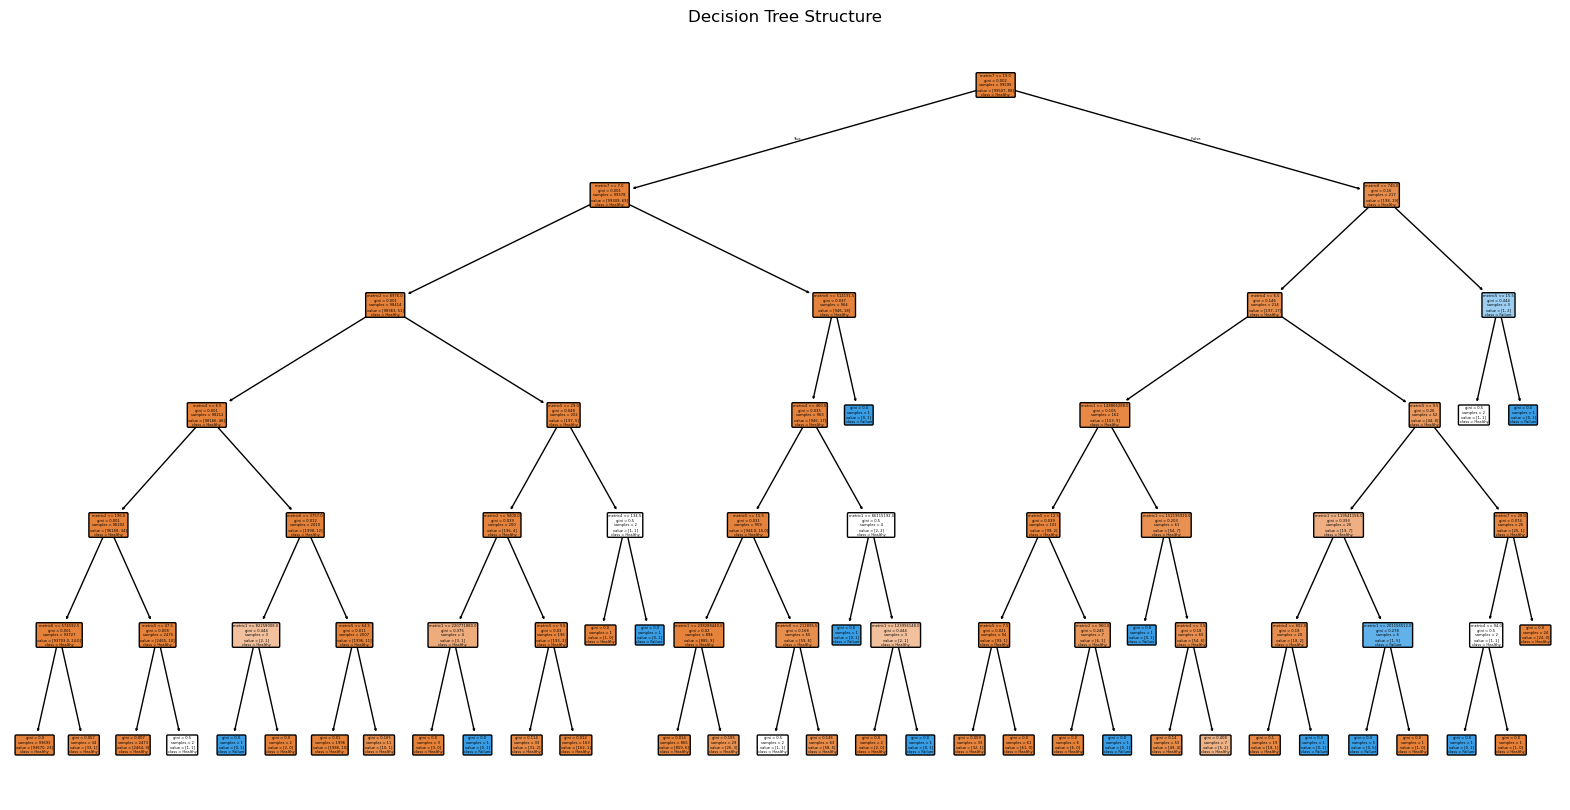

In [6]:
# Visualize Decision Tree (Matplotlib)
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["Healthy", "Failure"], filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [7]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=10, max_depth=6, random_state=42)
rf.fit(X_train, y_train)

# Predict
rf_preds = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.9992770794007791
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899



C:\Users\chenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\chenn\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


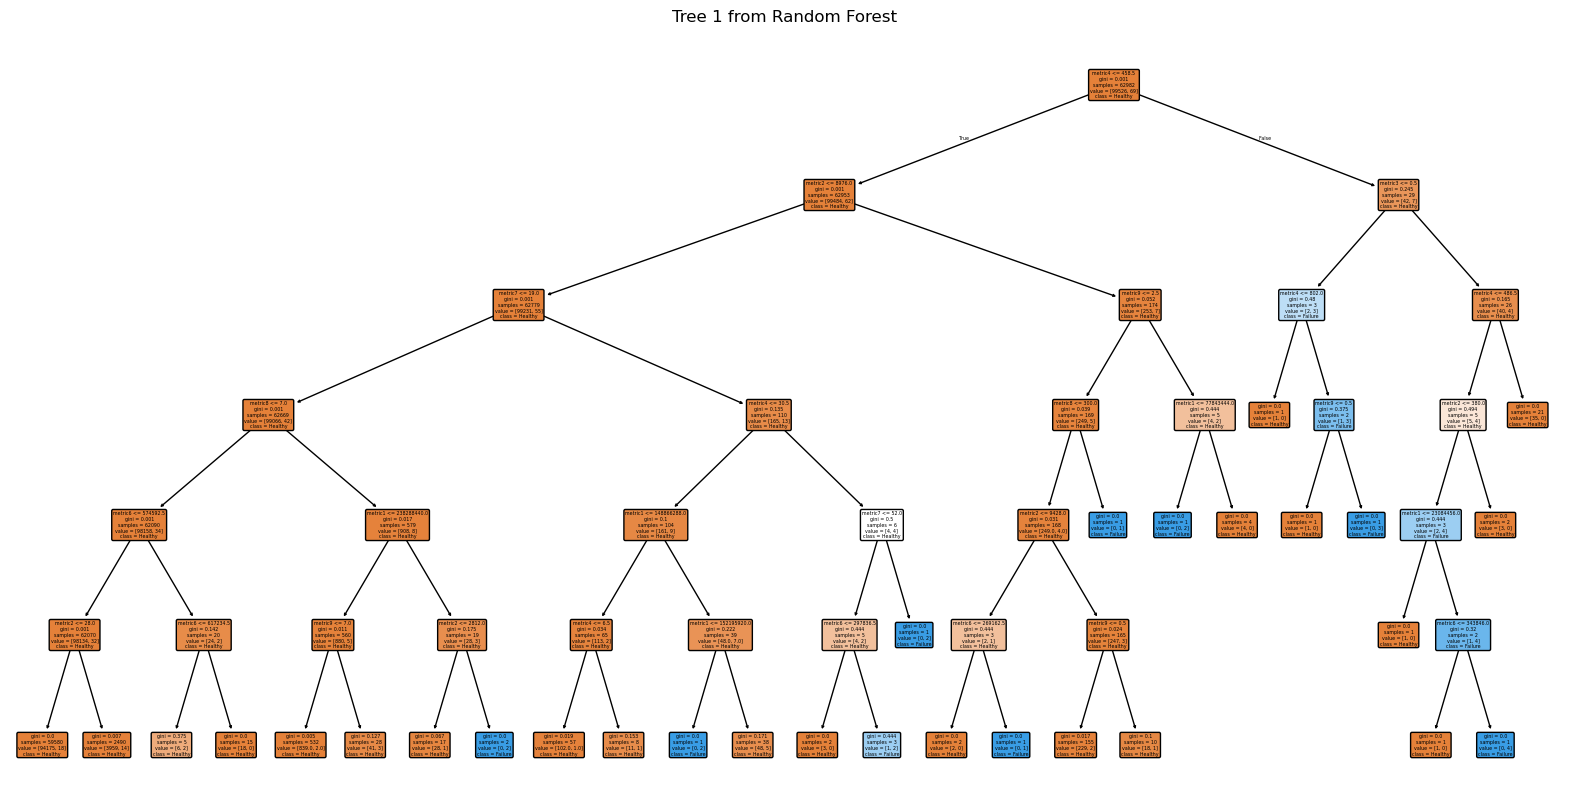

In [8]:
# Visualize One Tree from Random Forest (Matplotlib)
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], feature_names=X.columns, class_names=["Healthy", "Failure"], filled=True, rounded=True)
plt.title("Tree 1 from Random Forest")
plt.show()

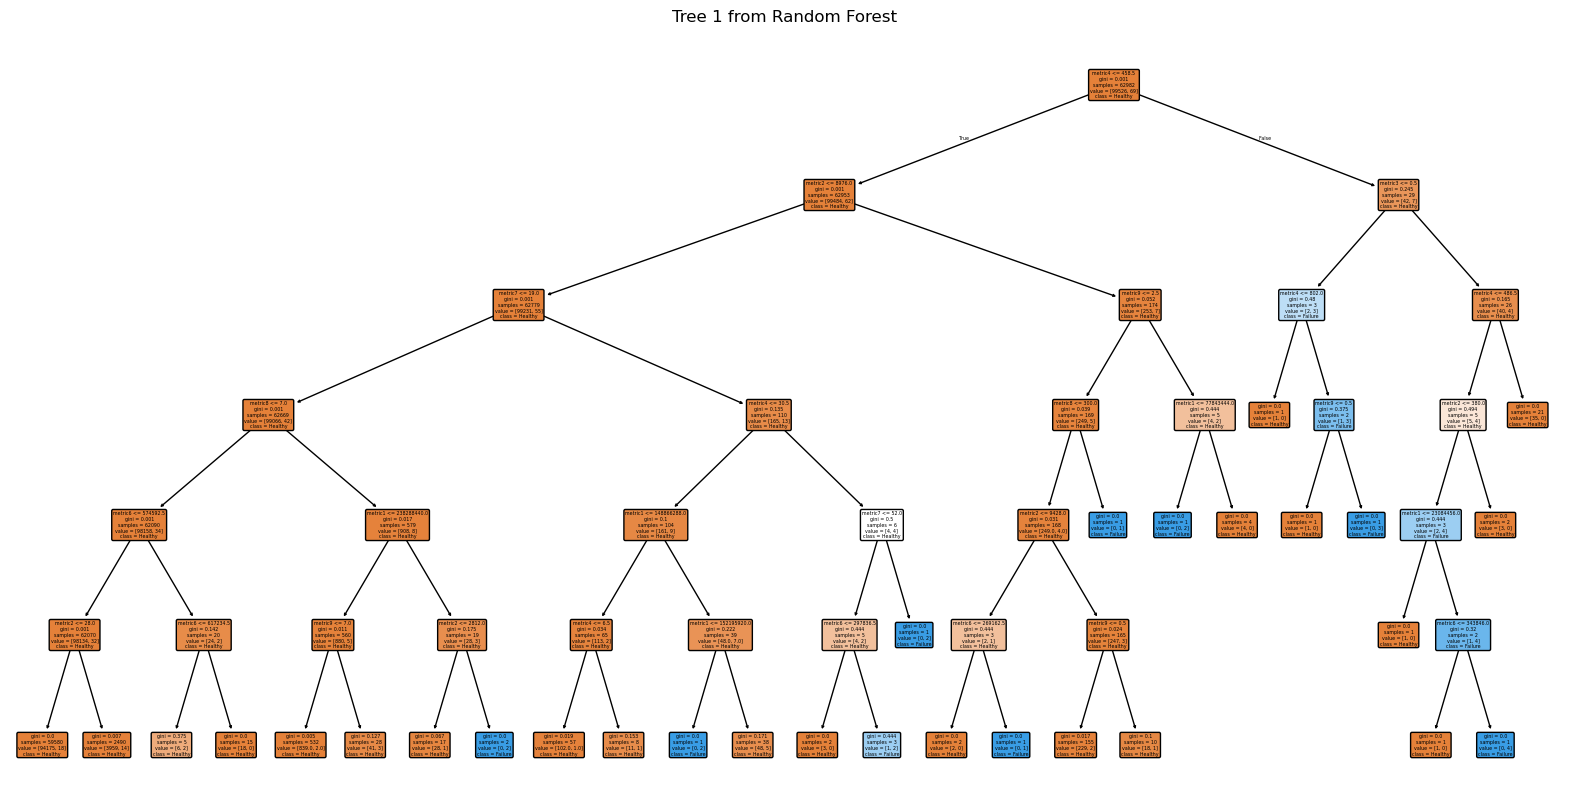

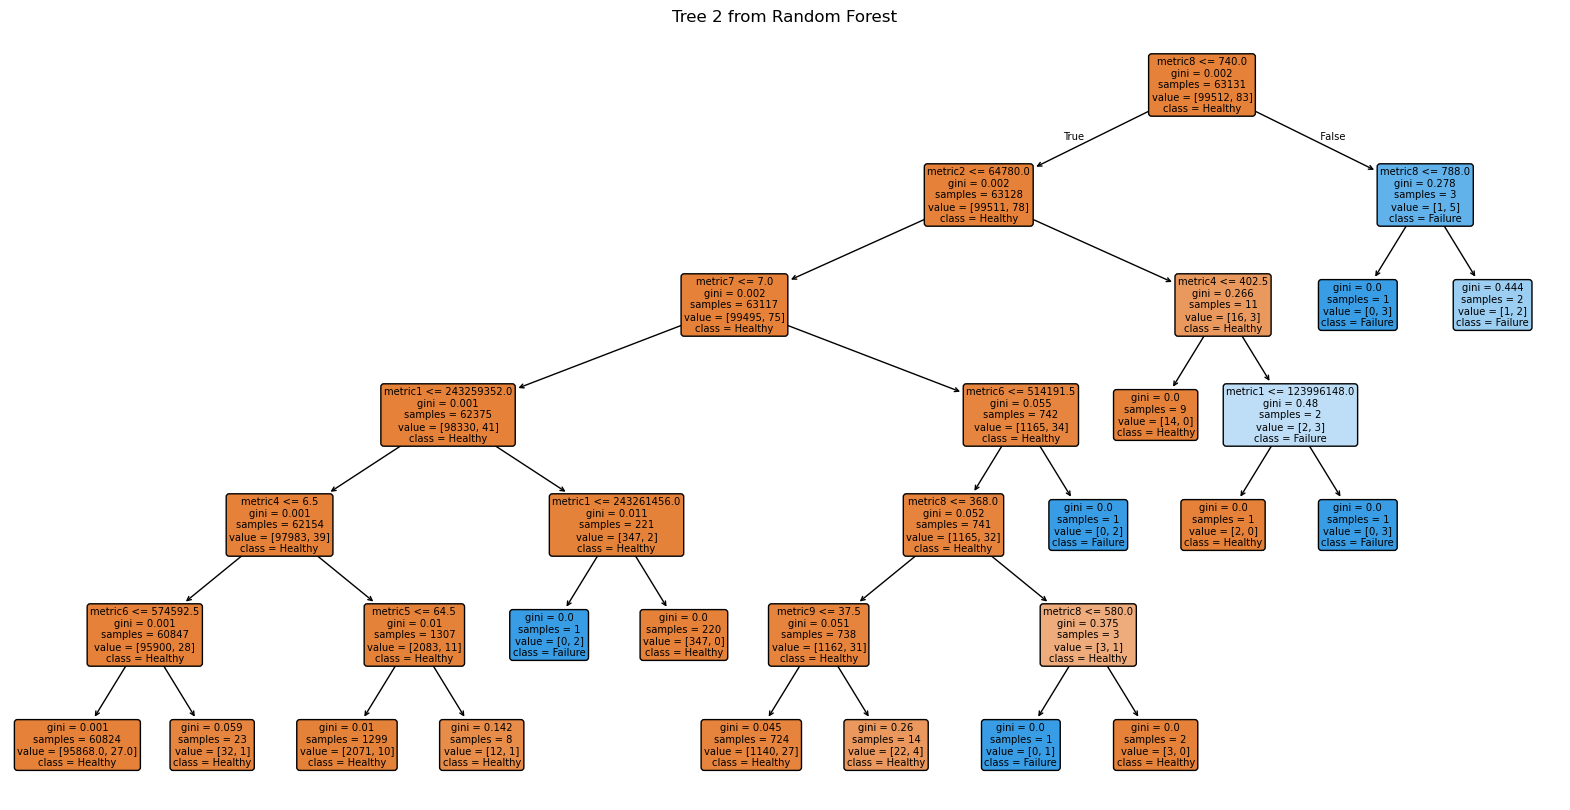

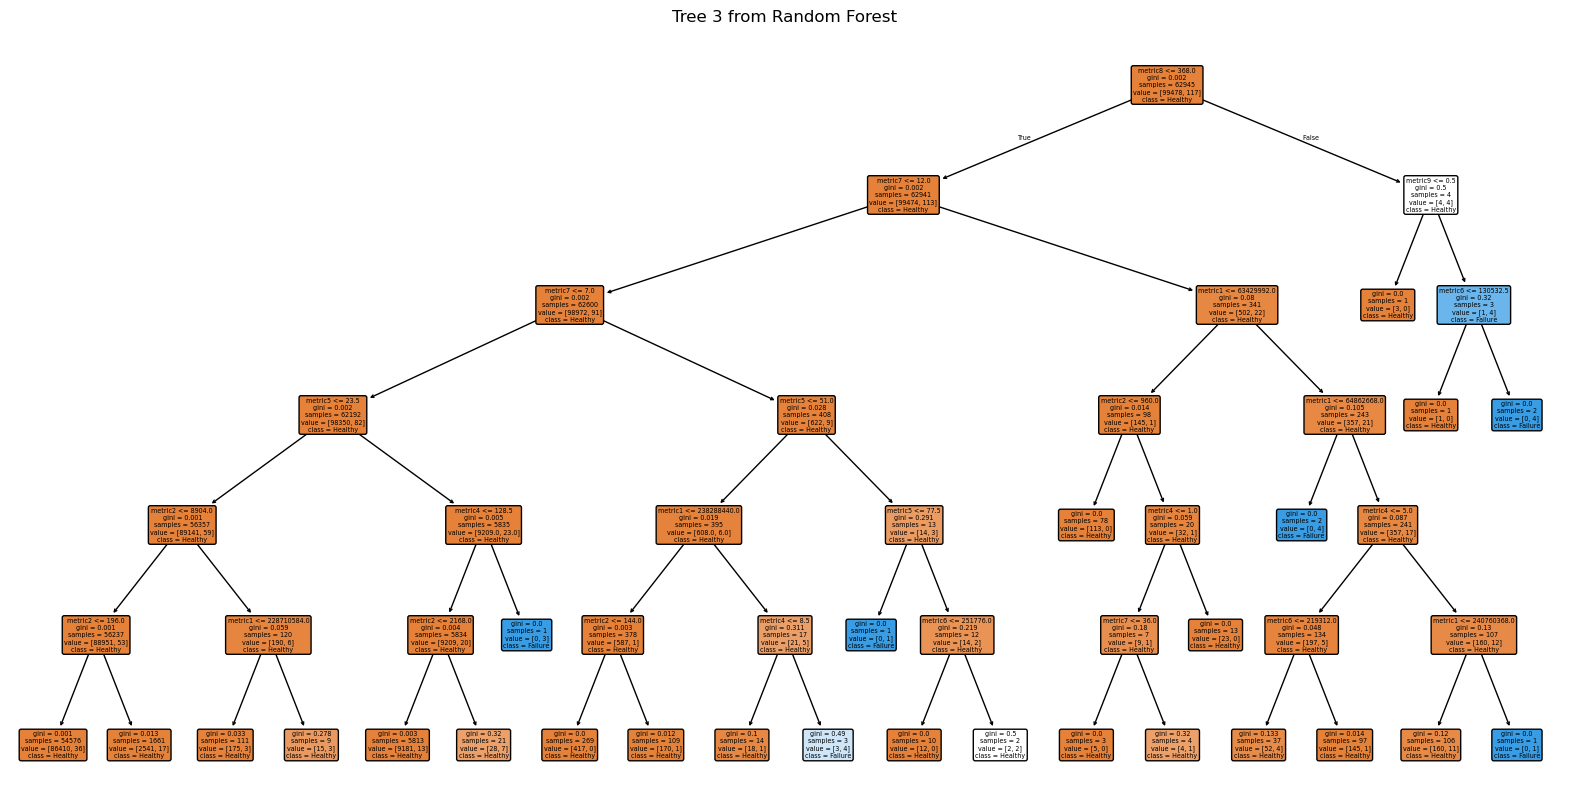

In [9]:
for i in range(3):
    plt.figure(figsize=(20, 10))
    plot_tree(rf.estimators_[i], feature_names=X.columns, class_names=["Healthy", "Failure"], filled=True, rounded=True)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.show()

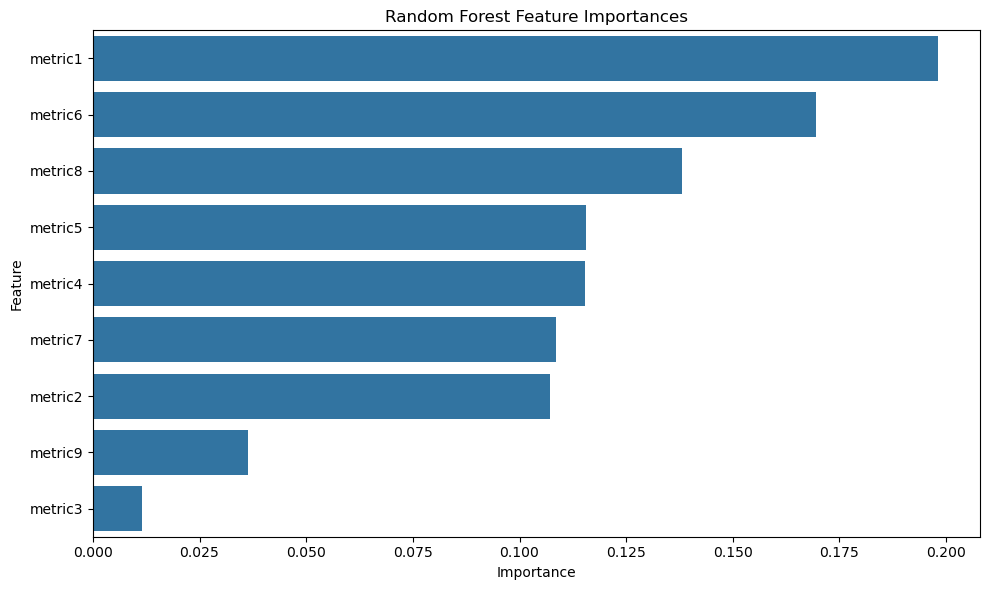

In [10]:
import seaborn as sns

importances = rf.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()


In [11]:
for i in range(3):
    plt.figure(figsize=(20, 10))
    plot_tree(rf.estimators_[i], feature_names=X.columns, class_names=["Healthy", "Failure"], filled=True, rounded=True)
    plt.title(f"Tree {i+1} from Random Forest")
    plt.savefig(f"random_forest_tree_{i+1}.png")
    plt.close()
